In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint ,  solve_ivp
import datetime

In [2]:
g_y=1.24e6   ##Hz
omega_0=4.45e15 ##Hz
del_omega=1e8
omega_1=omega_0-del_omega ##Hz
ohm=1e6         ##Hz
g_z0=0
g_z1=(20*ohm)**0.5
delta_0=100*ohm
N0=1e1

g_y/=ohm
g_z1/=ohm
g_z0/=ohm
omega_1/=ohm
omega_0/=ohm

In [6]:
from sys import platform

if platform == "darwin":
    folder="/Users/sjha/Documents/Github/new_model_data/"  ## mac
if platform == "win32":
    folder="C:\\Users\\jhash\\Documents\\renders\\opto\\" ## windows

print(folder)


C:\Users\jhash\Documents\renders\opto\


N0= 1.2499999999999997e+22


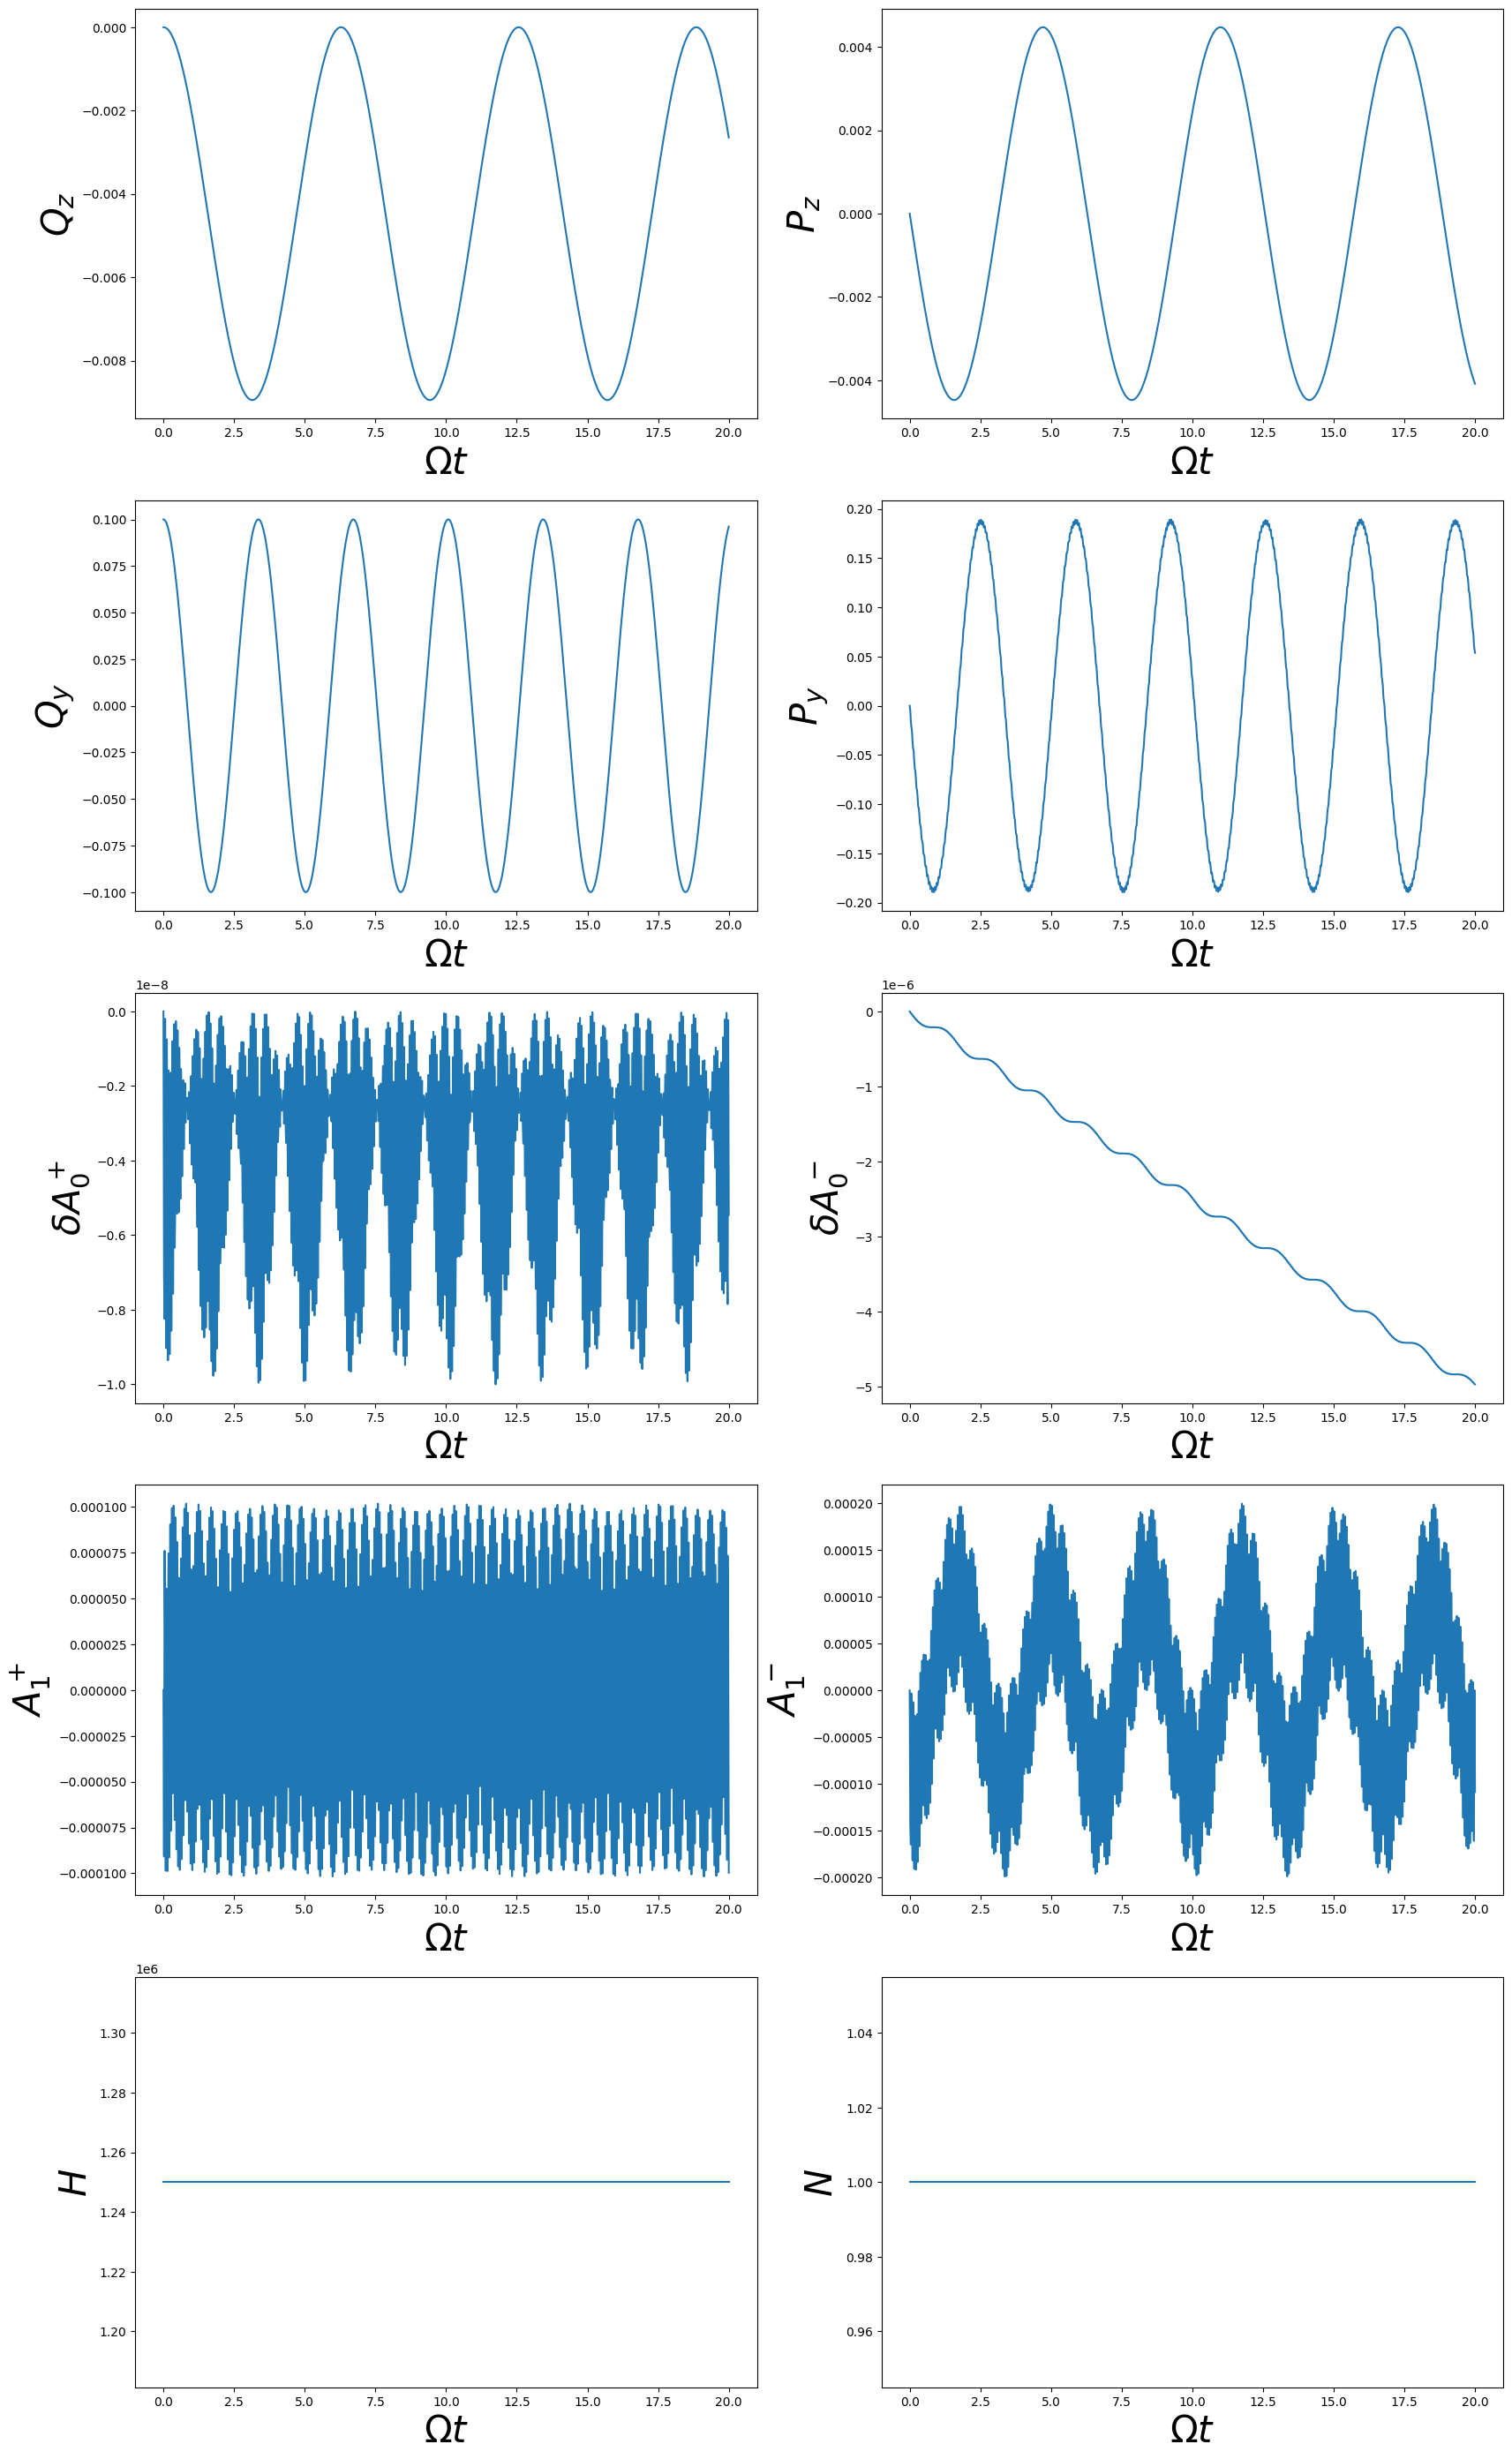

In [8]:
tf=2e1
P_c=0.1 ############### CRITICAL parameter
g_y=1e-1
N0=(P_c*del_omega)**3/(8*g_y**2)
print("N0=",N0)

title='$g_y={0}\Omega  \: ; \: N_0={1} \: ; \: P_c={2}$'.format(g_y,N0,P_c)
file="real_stable_P_c={0}_g_y={1}_tf={2}".format(P_c,g_y,tf)


fig, axs = plt.subplots(5, 2,figsize=(20,35))
data = np.load(folder+file+".npz")
sol=data['sol']
t=data['t']
label_list=data['label']

for i in range(10):
    axs[i//2,i%2].plot(t,sol[i])
    axs[i//2,i%2].set_ylabel(label_list[i],fontsize=30)
    axs[i//2,i%2].set_xlabel('$\Omega  t$',fontsize=30)
#     axs[i//2,i%2].legend(fontsize=12)
# fig.suptitle("$\\lambda={0} \: ; \:  \\nu={1} \: ; \: P_c={2}$".format(np.round(lam,2),np.round(nu,2),P_c),fontsize=30)
plt.show() 

N0= 12499.999999999998


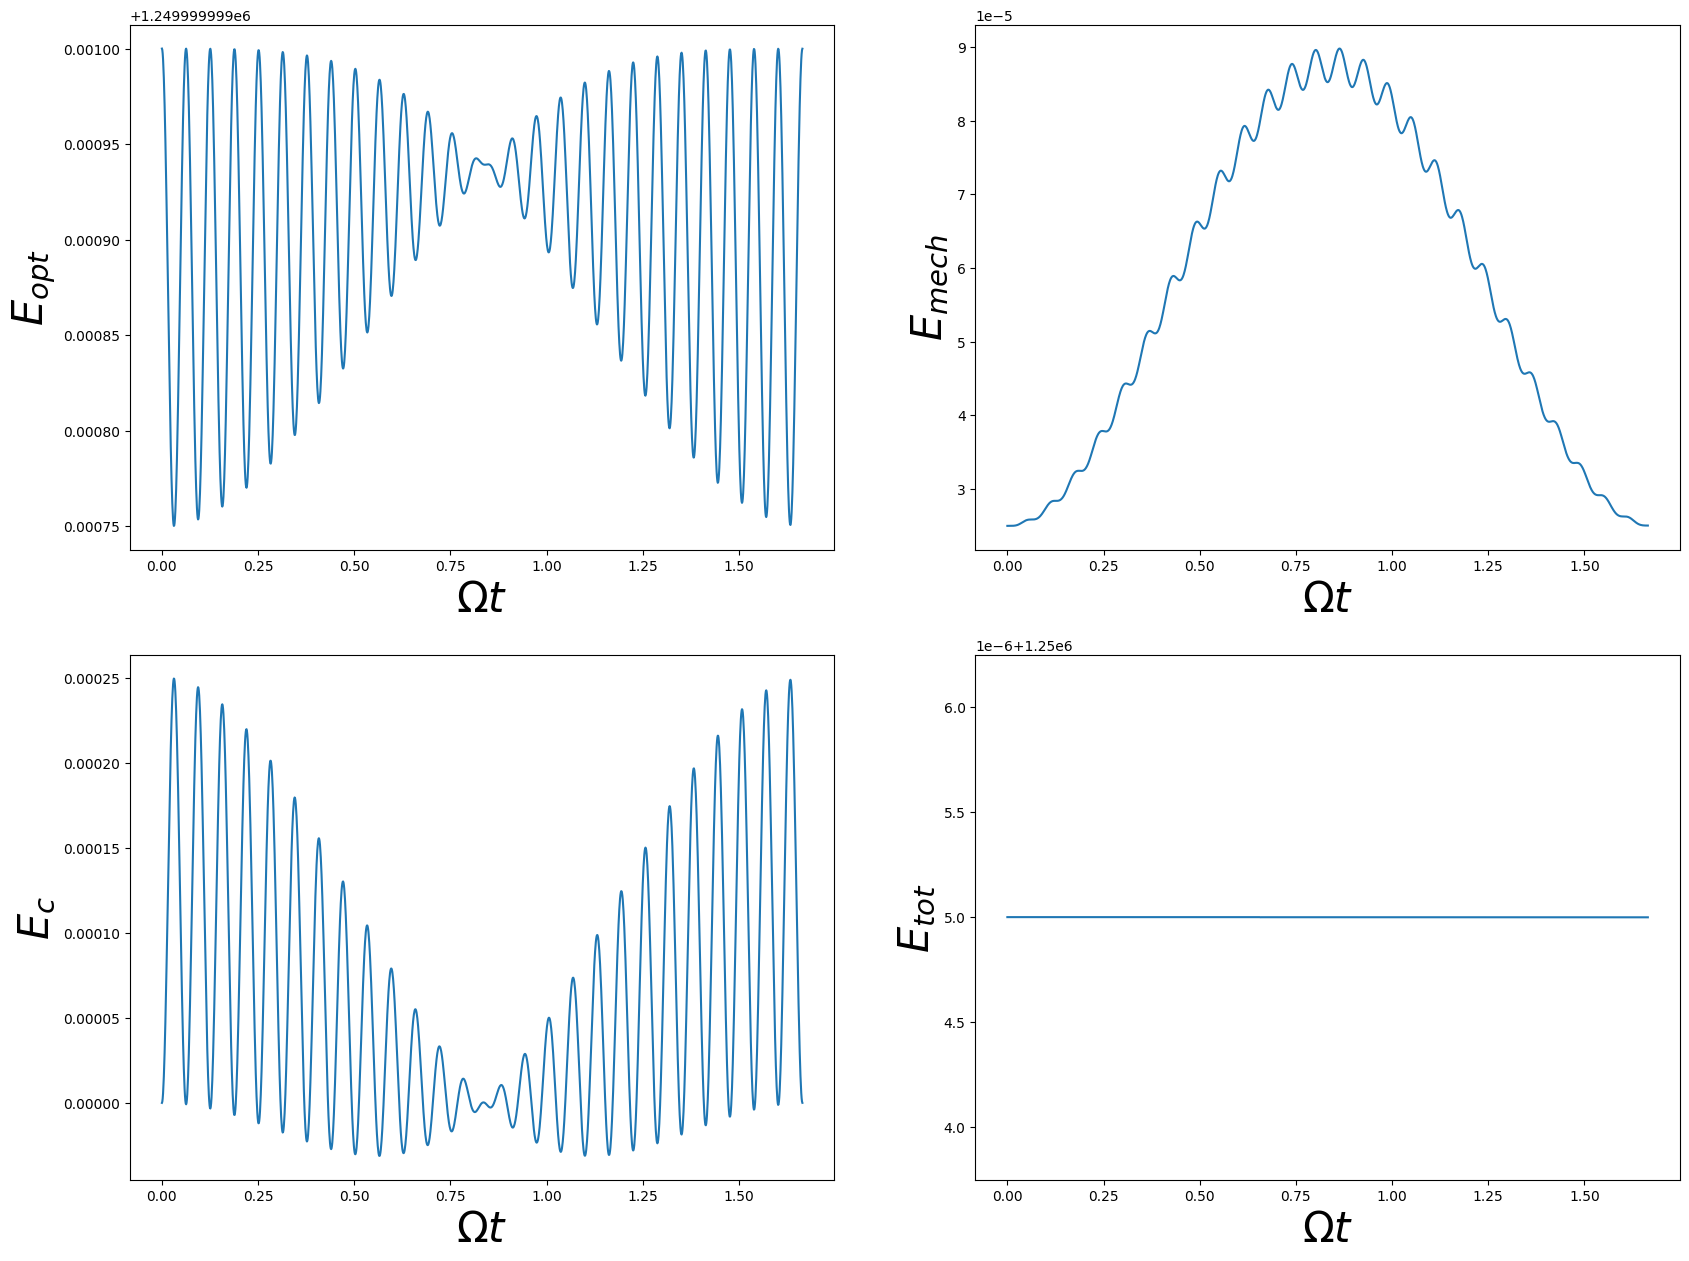

In [23]:
tf=1e1
P_c=0.1 ############### CRITICAL parameter
g_y=1e-1
N0=(P_c*del_omega)**3/(8*g_y**2)
print("N0=",N0)

file="real_stable_P_c={0}_g_y={1}_tf={2}".format(P_c,g_y,tf)


data = np.load(folder+file+".npz")
sol=data['sol']
t=data['t']
l=len(t)
g_z1,g_y,del_omega,N0=data['param']

# q_z,p_z,q_y,p_y,A0_p,A0_m,A1_p,A1_m=sol
# sigma_m=2*(A1_p*A0_m-A1_m*(A0_p+1))
# E_opt=del_omega*((1+A0_p)**2+A0_m**2)+0*N0*omega_1
# E_mech=(q_z**2+q_y**2+p_y**2+p_z**2)/4
# E_c=q_z*N0*g_z1*(A1_p**2+A1_m**2)/2+g_y*q_y*sigma_m/2
E_opt=sol[8]
E_mech=sol[9]
E_c=sol[10]


E_tot=E_opt+E_mech+E_c
E=[E_opt,E_mech,E_c,E_tot]
title='$g_y={0}\Omega  \: ; \: N_0={1} \: ; \: P_c={2}$'.format(g_y,N0,P_c)
label_list=["$E_{opt}$","$E_{mech}$","$E_{c}$","$E_{tot}$"]
fig, axs = plt.subplots(2, 2,figsize=(20,15))

for i in range(4):
    axs[i//2,i%2].plot(t[:l//6],E[i][:l//6])
    axs[i//2,i%2].set_ylabel(label_list[i],fontsize=30)
    axs[i//2,i%2].set_xlabel('$\Omega  t$',fontsize=30)
#     axs[i//2,i%2].legend(fontsize=12)
# fig.suptitle("$\\lambda={0} \: ; \:  \\nu={1} \: ; \: P_c={2}$".format(np.round(lam,2),np.round(nu,2),P_c),fontsize=30)
plt.show() 

N0= 12499.999999999998


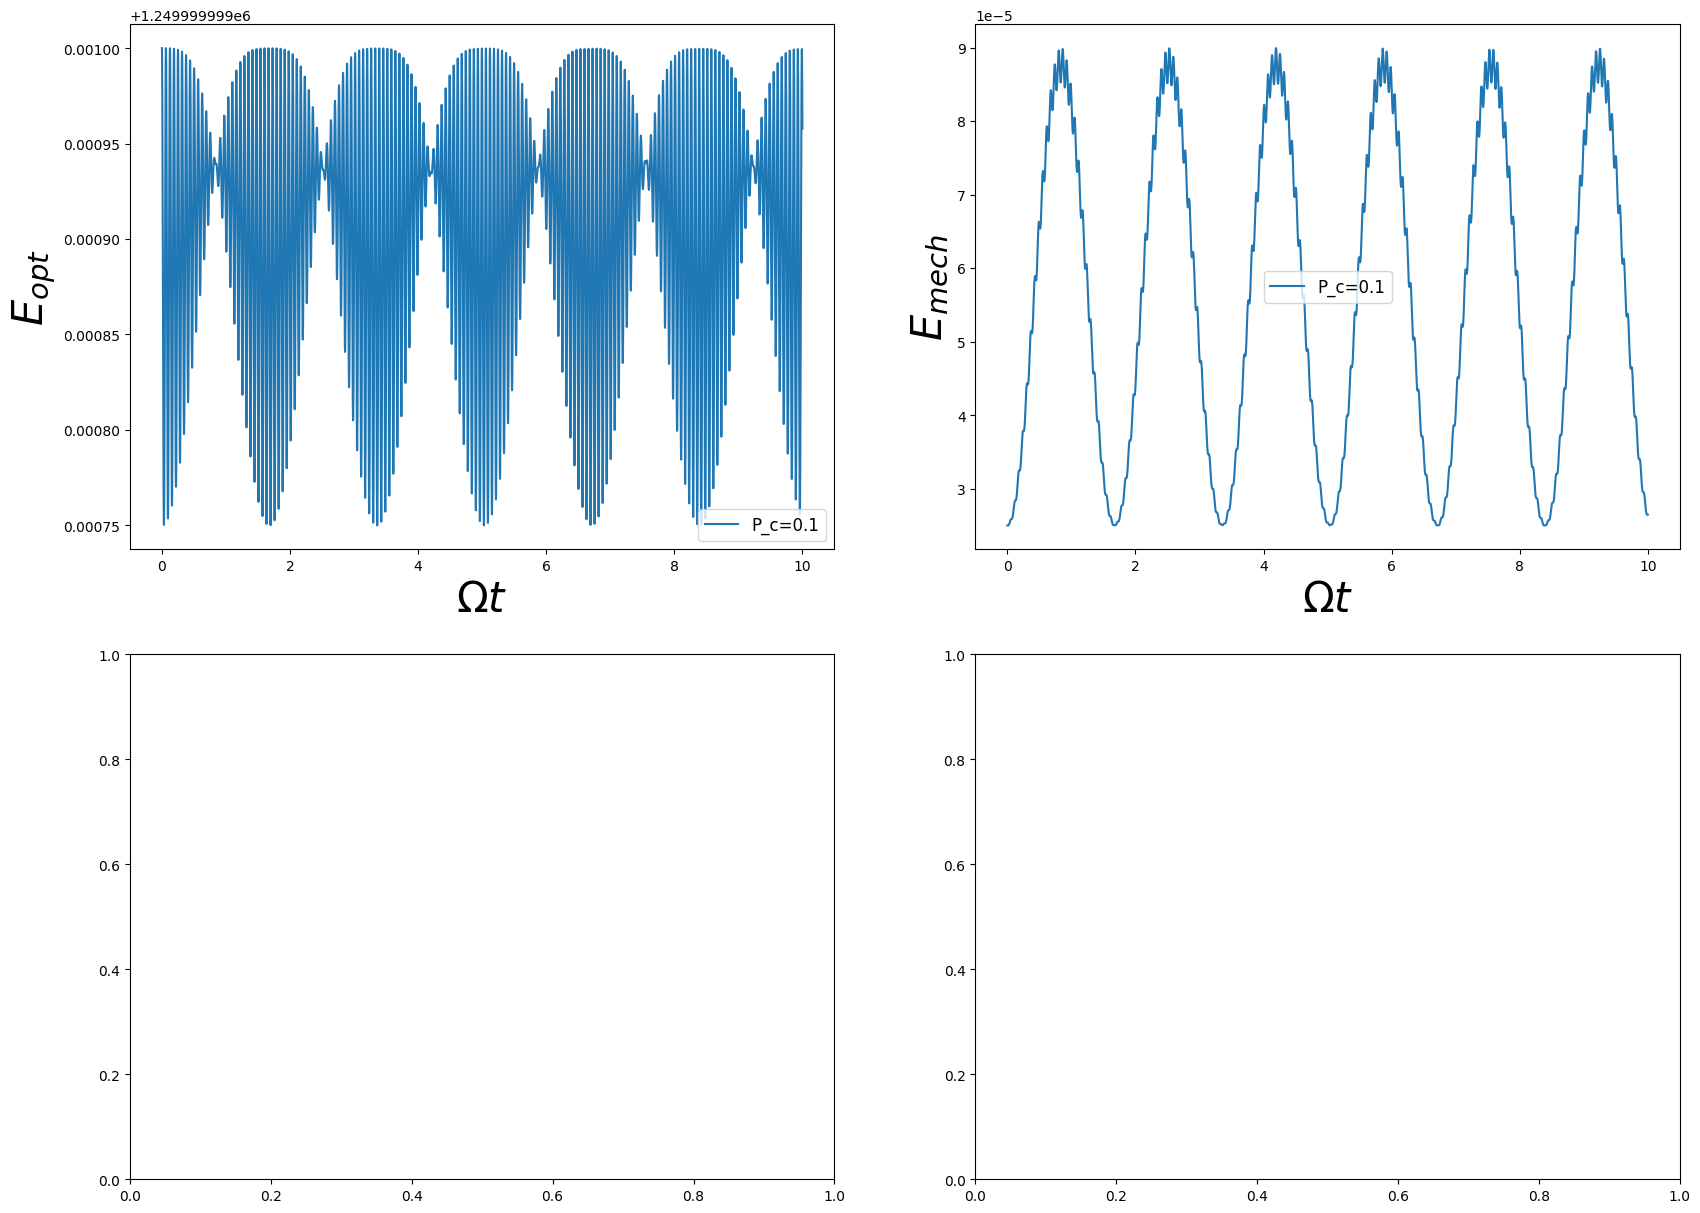

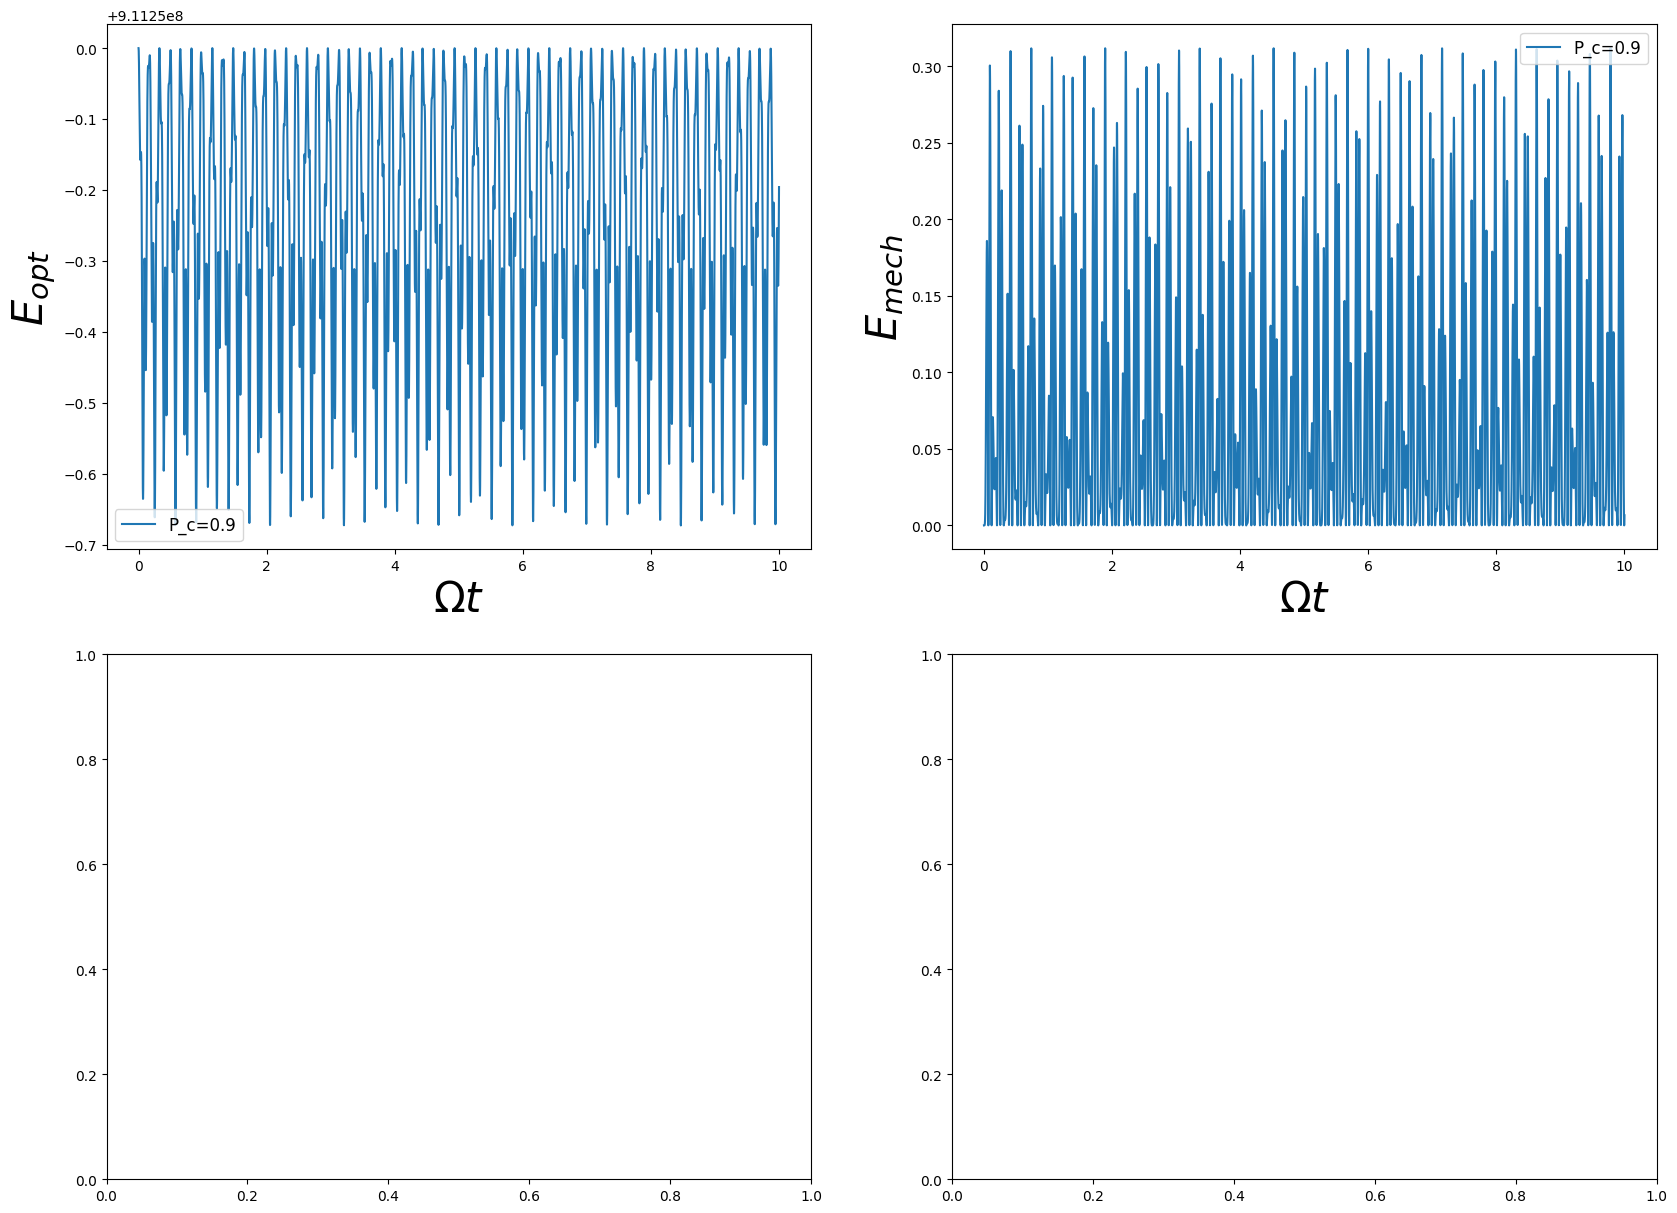

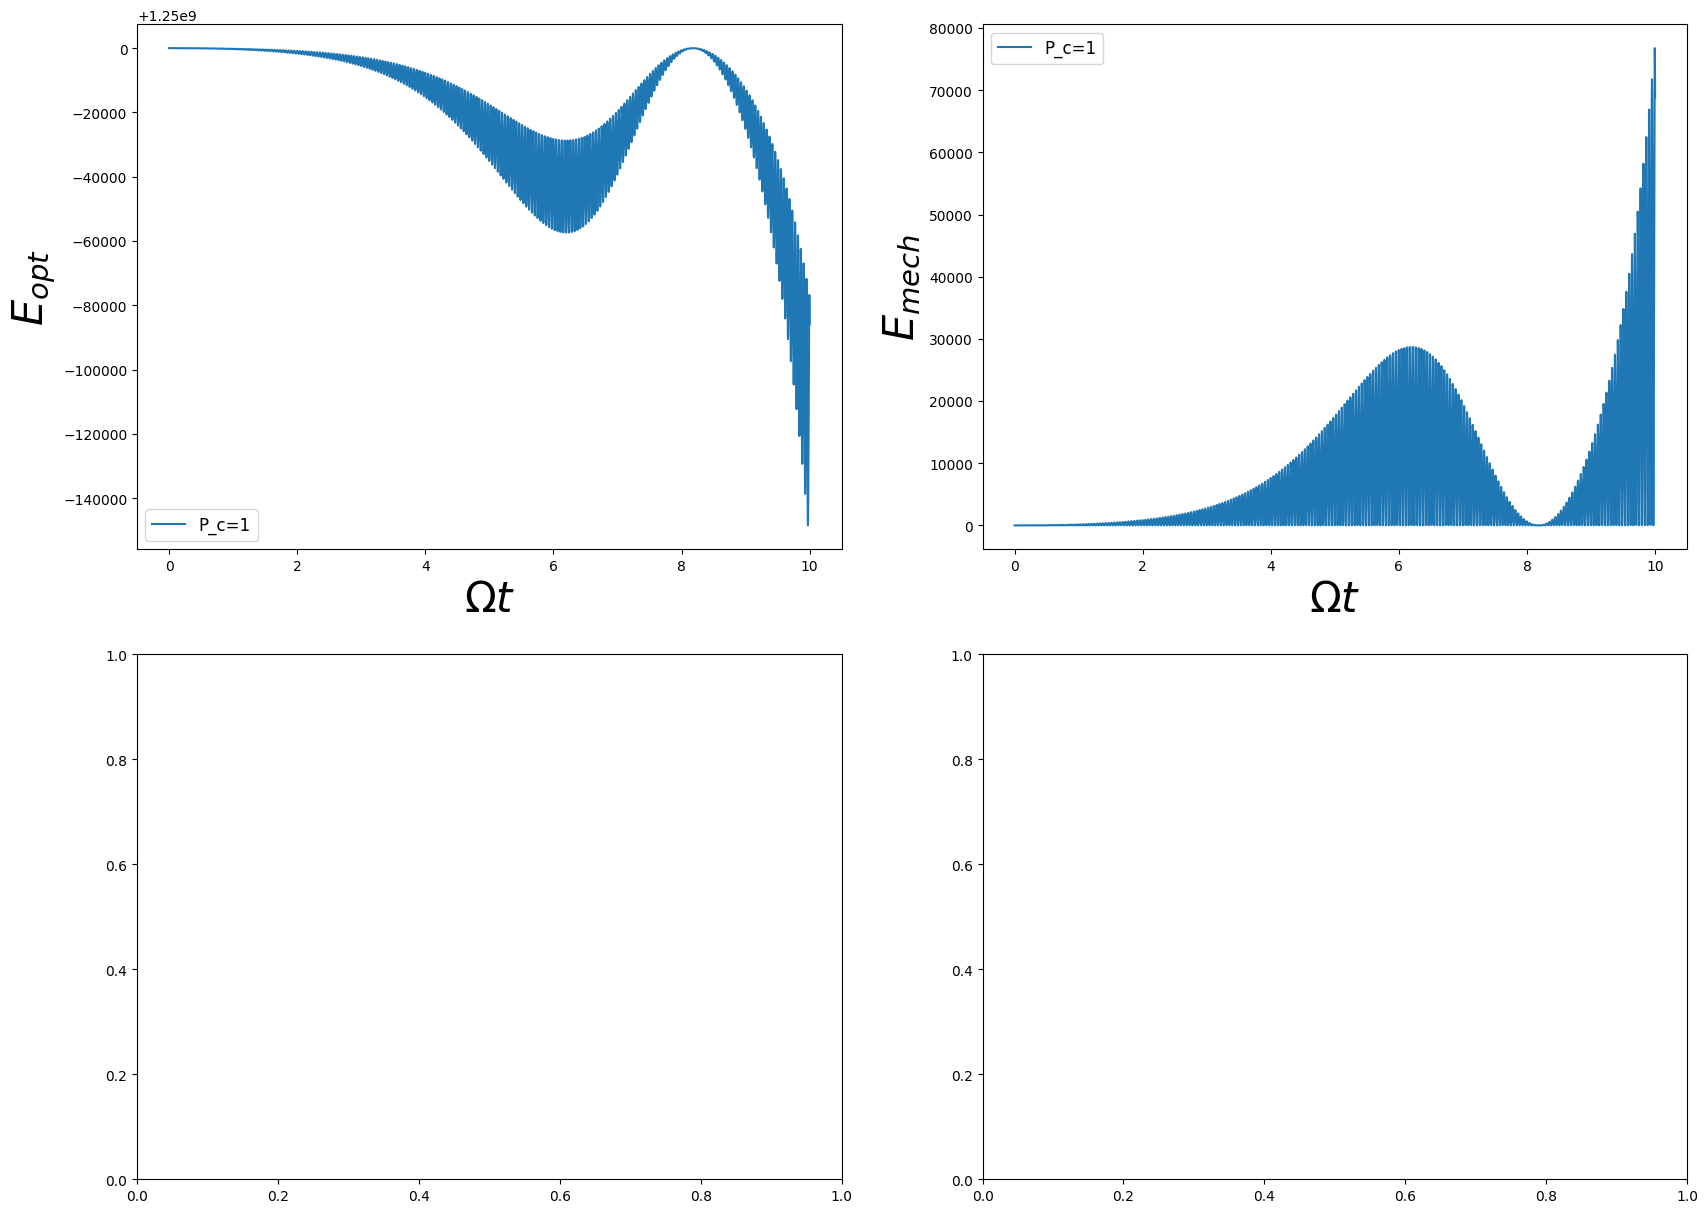

In [25]:
tf=1e1
P_c_list=[0.1,0.9,1] ############### CRITICAL parameter
g_y=1e-1
N0=(P_c*del_omega)**3/(8*g_y**2)
print("N0=",N0)
title='$g_y={0}\Omega  \: ; \: N_0={1} \: ; \: P_c={2}$'.format(g_y,N0,P_c)

for k,P_c in enumerate(P_c_list):
    file="real_stable_P_c={0}_g_y={1}_tf={2}".format(P_c,g_y,tf)
    data = np.load(folder+file+".npz")
    sol=data['sol']
    t=data['t']
    l=len(t)
    E_opt=sol[8]
    E_mech=sol[9]

    E=[E_opt,E_mech]
    label_list=["$E_{opt}$","$E_{mech}$"]
    fig, axs = plt.subplots(2, 2,figsize=(20,15))

    for i in range(2):
        axs[i//2,i%2].plot(t,E[i],label="P_c={0}".format(P_c))
        axs[i//2,i%2].set_ylabel(label_list[i],fontsize=30)
        axs[i//2,i%2].set_xlabel('$\Omega  t$',fontsize=30)
        axs[i//2,i%2].legend(fontsize=12)
    # fig.suptitle("$\\lambda={0} \: ; \:  \\nu={1} \: ; \: P_c={2}$".format(np.round(lam,2),np.round(nu,2),P_c),fontsize=30)
plt.show() 